# Projet : Concevez une application au service de la santé publique

# 2. Analyse exploratoire des données :

## Objectif :

- Développer une premiere stratégie de modélisation
- Prédictions de nutri-score-fr

## Checklist de base 

## Analyse de Fond :

###  Visualisation de la target :  
- 50%(=med) des produits de France ont des nutri-score-fr compris entre [-10, 9]

### Signification des variables :
- variables continues skewed (asymétriques), outliers, nutriments
- nutrition-score-fr_100g : difficile d'interpreter ce graphique, ces données ont été traités par une formule mathématique prenant en compte plusieurs variables (nutriments).

### Relation Variables / Target :
- energy-kcal_100g, proteins_100g / target : ces variables semblent liées à nutri-score-fr -> hypothèse a tester
- sodium_100g,  saturated-fat_100g, sugars_100g / target : ces variables ne semblent pas liées à nutri score fr 

## Analyse plus détaillée :

### Relation Variables / Variables :
- il y a une forte corrélation positive entre energy-kcal_100g et saturated-fat_100g (+0.61)
- il y a une forte corrélation négative sugars_100g et proteins_100g (-0.58)
- il y a une faible corrélation positive entre energy-kcal_100g et sugars_100g (+0.26)  
- il y a une faibles corrélation positive entre saturated-fat_100g et proteins_100g (+0.26)
- il y a une faibles corrélation positive entre sodium_100g et proteins_100g (+0.20)
- il y a une faibles corrélation négative entre sodium_100g et sugars_100g (-0.18)
- il y a une faibles corrélation positive entre sodium_100g et energy-kcal_100g (+0.21)
- il y a une faibles corrélation positive entre sodium_100g et saturated-fat_100g (+0.30)
- il n'y a pas de corrélation entre proteins_100g et energy-kcal_100g
- il n'y a pas de corrélation entre sugars_100g et saturated-fat_100g

### Corrélations Target / Variables :
- nutri-score-fr / energy-kcal_100g, saturated-fat_100g, sugars_100g : il y a une forte corrélation positive entre energy-kcal_100g, saturated-fat_100g, sodium_100g et nutri-score-fr -> hypothèse à tester
- nutri-score-fr / sugars_100g : il y a une faible corrélation positive entre sugars_100g, sodium_100g et nutri-score-fr
- nutri-score-fr / proteins_100g : il y a une faible corrélation négative entre proteins_100g et nutri-score-fr -> hypothèse à tester 

## hypothèse nulle (H0):
- H0 = les nutriments energy-kcal et le nutri score fr sont significativement corrélés, au seuil 0.05
- H0 = le nutriment proteins_100g et le nutri score fr sont significativement corrélés, au seuil 0.05

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
prod = pd.read_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P3_OC\P3_Données\en.openfoodfacts.org.products.reduit.csv")

In [37]:
df = prod.copy()

# 2.1. Analyse de Fond :

In [38]:
df.shape

(9584, 7)

In [39]:
df.head()

,Unnamed: 0,nutrition-score-fr_100g,energy-kcal_100g,sugars_100g,saturated-fat_100g,sodium_100g,proteins_100g
0,13,1.0,32.0,3.9,0.1,0.168,0.9
1,21,14.0,381.0,21.9,15.5,0.040,4.6
2,31,-2.0,157.0,27.0,0.0,0.000,0.6
3,35,1.0,143.0,1.0,1.0,0.108,1.9
4,60,14.0,397.0,0.1,21.6,0.520,25.0


In [40]:
df = df[['nutrition-score-fr_100g', 'energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'proteins_100g']]
df.head()

,nutrition-score-fr_100g,energy-kcal_100g,sugars_100g,saturated-fat_100g,sodium_100g,proteins_100g
0,1.0,32.0,3.9,0.1,0.168,0.9
1,14.0,381.0,21.9,15.5,0.040,4.6
2,-2.0,157.0,27.0,0.0,0.000,0.6
3,1.0,143.0,1.0,1.0,0.108,1.9
4,14.0,397.0,0.1,21.6,0.520,25.0


In [41]:
df.describe()

,nutrition-score-fr_100g,energy-kcal_100g,sugars_100g,saturated-fat_100g,sodium_100g,proteins_100g
count,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000,9584.000000
mean,8.437917,256.711969,4.831689,6.801109,0.350109,14.234696
std,8.530228,145.695431,7.164966,7.439465,0.281601,9.011549
min,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,126.000000,0.000000,0.600000,0.072000,6.100000
50%,9.000000,248.000000,0.800000,3.200000,0.320000,15.900000
75%,15.000000,380.000000,8.000000,12.000000,0.560000,23.000000
max,32.000000,750.000000,29.500000,24.000000,1.360000,42.000000


## Examen de la colonne target

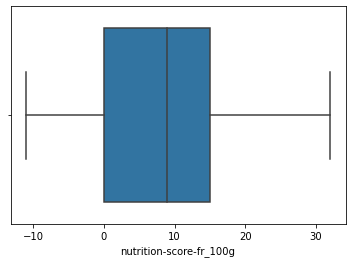

In [42]:
plt.figure()
sns.boxplot(x=df['nutrition-score-fr_100g'])

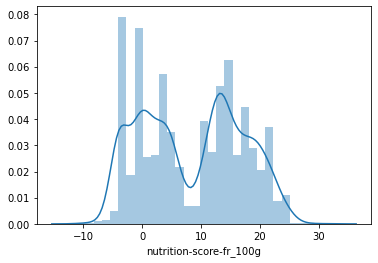

In [43]:
plt.figure()
sns.distplot(df['nutrition-score-fr_100g'])

## Boxplot des variables :

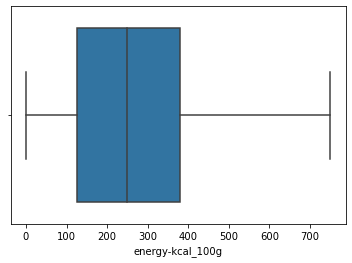

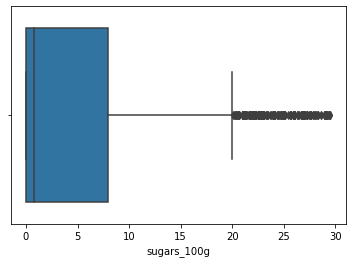

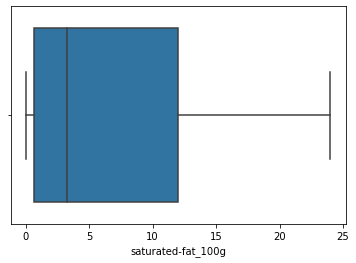

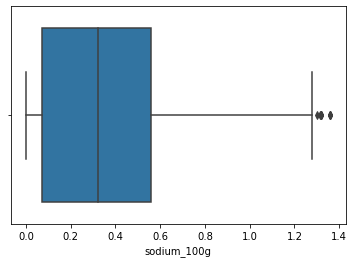

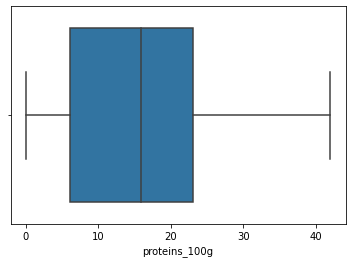

In [44]:
for col in df[['energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'proteins_100g']]:
    plt.figure()
    sns.boxplot(x=df[col])

## Histogrames des variables :

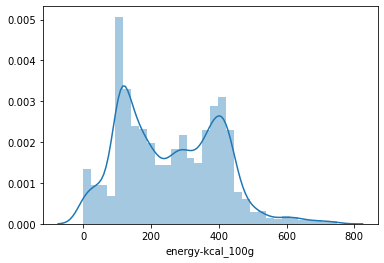

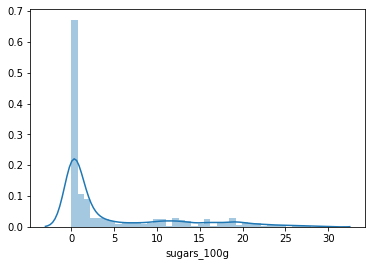

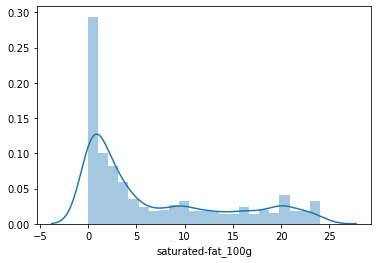

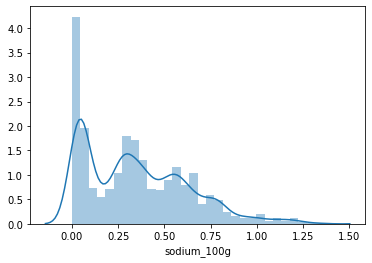

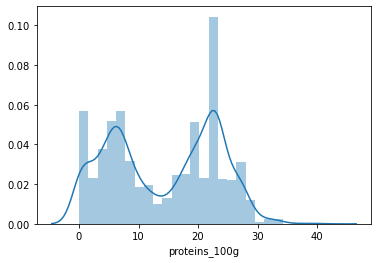

In [45]:
for col in df[['energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'proteins_100g']]:
    plt.figure()
    sns.distplot(df[col])

#  Relation Variables / Target :

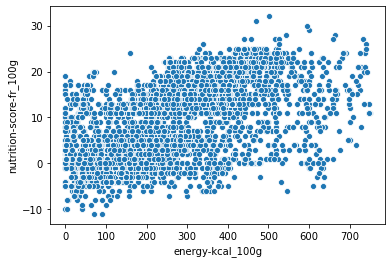

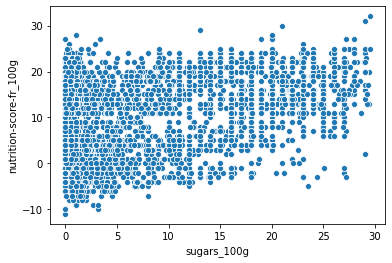

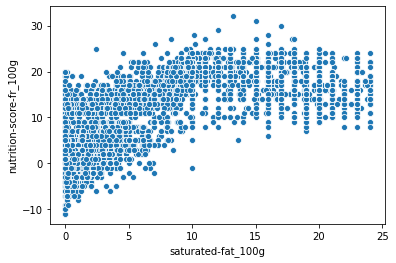

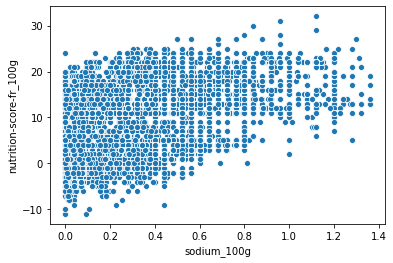

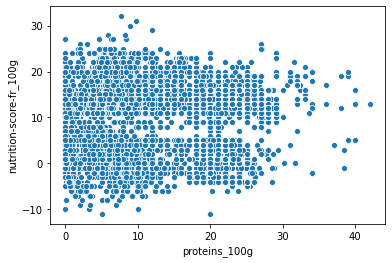

In [46]:
for col in df[['energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'proteins_100g']]:
    plt.figure()
    sns.scatterplot(x=df[col], y=df['nutrition-score-fr_100g'], data=df)

# 2.2. Analyse un peu plus Avancée 

## Relation Variables / Variables

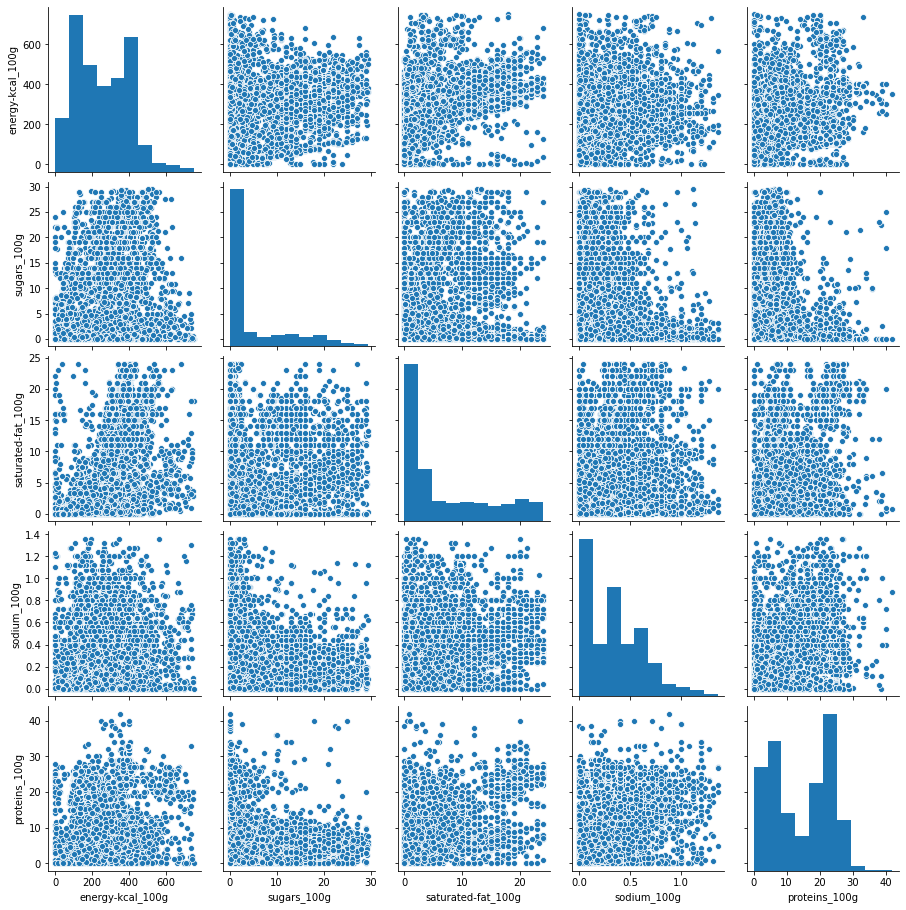

In [47]:
sns.pairplot(df[['energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'proteins_100g']])

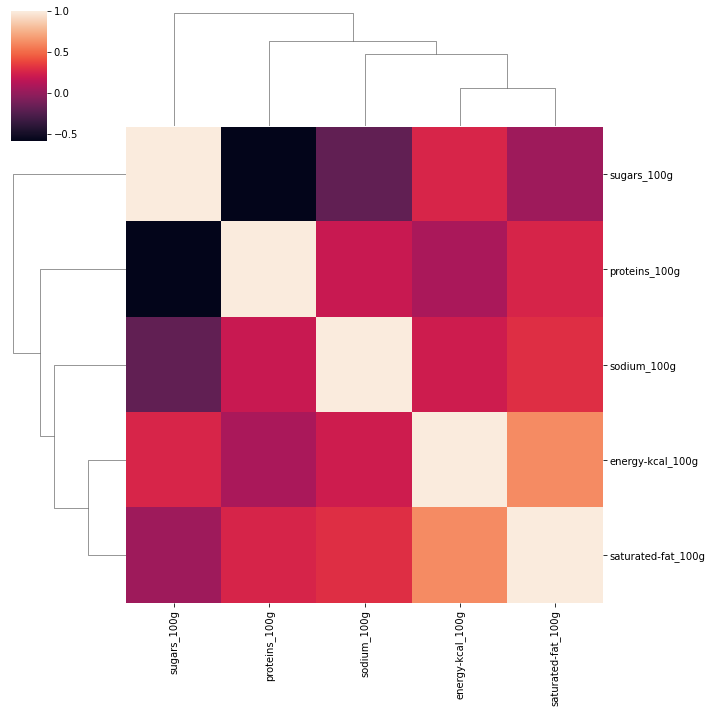

In [48]:
sns.clustermap(df[['energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'proteins_100g']].corr())

In [49]:
df[['energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'proteins_100g']].corr()['energy-kcal_100g'].sort_values()

proteins_100g         0.082864
sodium_100g           0.219123
sugars_100g           0.267781
saturated-fat_100g    0.619552
energy-kcal_100g      1.000000
Name: energy-kcal_100g, dtype: float64

In [50]:
df[['sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'proteins_100g']].corr()['sugars_100g'].sort_values()

proteins_100g        -0.581659
sodium_100g          -0.184430
saturated-fat_100g    0.041324
sugars_100g           1.000000
Name: sugars_100g, dtype: float64

In [51]:
df[['saturated-fat_100g', 'sodium_100g', 'proteins_100g']].corr()['saturated-fat_100g'].sort_values()

proteins_100g         0.261348
sodium_100g           0.304080
saturated-fat_100g    1.000000
Name: saturated-fat_100g, dtype: float64

In [52]:
df[['sodium_100g', 'proteins_100g']].corr()['sodium_100g'].sort_values()

proteins_100g    0.200932
sodium_100g      1.000000
Name: sodium_100g, dtype: float64

## Relations Target / Variables

<Figure size 432x288 with 0 Axes>

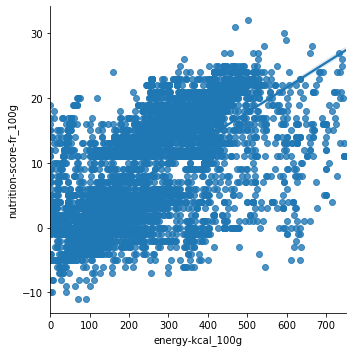

<Figure size 432x288 with 0 Axes>

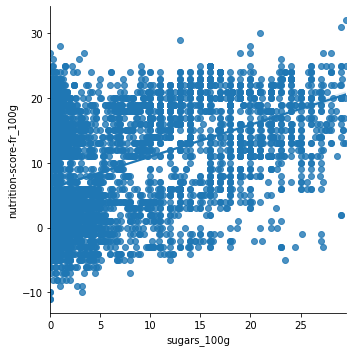

<Figure size 432x288 with 0 Axes>

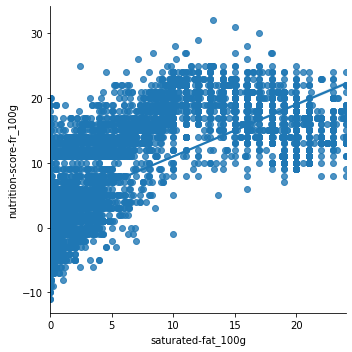

<Figure size 432x288 with 0 Axes>

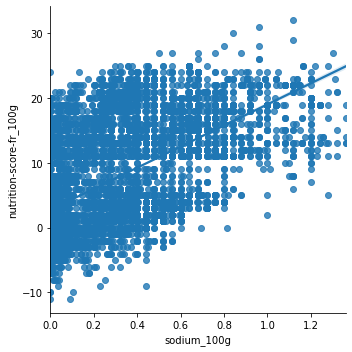

<Figure size 432x288 with 0 Axes>

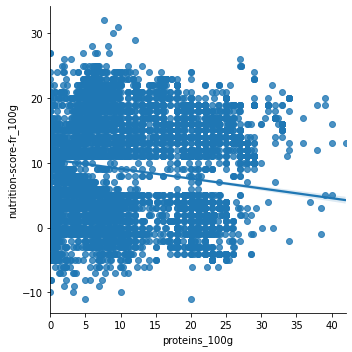

In [53]:
for col in df[['energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'proteins_100g']]:
    plt.figure()
    sns.lmplot(x=col, y='nutrition-score-fr_100g', data=df)

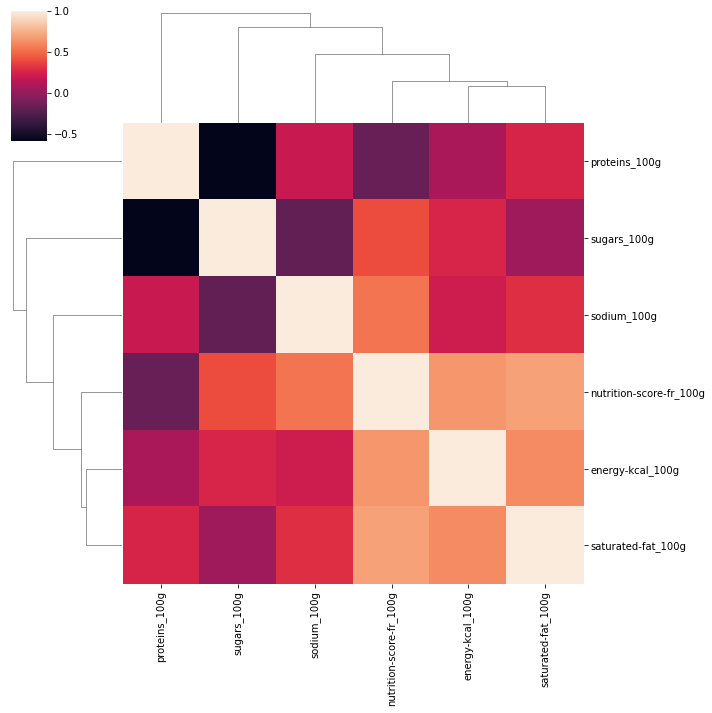

In [54]:
sns.clustermap(df[['nutrition-score-fr_100g','energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'proteins_100g']].corr())

In [55]:
df[['nutrition-score-fr_100g', 'energy-kcal_100g', 'sugars_100g', 'saturated-fat_100g', 'sodium_100g', 'proteins_100g']].corr()['nutrition-score-fr_100g'].sort_values()

proteins_100g             -0.159078
sugars_100g                0.412281
sodium_100g                0.537814
energy-kcal_100g           0.655617
saturated-fat_100g         0.699421
nutrition-score-fr_100g    1.000000
Name: nutrition-score-fr_100g, dtype: float64

# Test statistics 

In [56]:
import statsmodels.api as sm

- H0 = les nutriments energy-kcal et le nutri score fr sont significativement corrélés, au seuil 0.05

In [57]:
X = df['energy-kcal_100g'] 
Y = df['nutrition-score-fr_100g']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     nutrition-score-fr_100g   R-squared:                       0.430
Model:                                 OLS   Adj. R-squared:                  0.430
Method:                      Least Squares   F-statistic:                     7224.
Date:                     Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                             10:51:23   Log-Likelihood:                -31451.
No. Observations:                     9584   AIC:                         6.291e+04
Df Residuals:                         9582   BIC:                         6.292e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

- H0 = le nutriment proteins_100g et le nutri score fr sont significativement corrélés, au seuil 0.05

In [58]:
X = df['proteins_100g'] 
Y = df['nutrition-score-fr_100g']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     nutrition-score-fr_100g   R-squared:                       0.025
Model:                                 OLS   Adj. R-squared:                  0.025
Method:                      Least Squares   F-statistic:                     248.8
Date:                     Fri, 18 Dec 2020   Prob (F-statistic):           2.38e-55
Time:                             10:51:28   Log-Likelihood:                -34020.
No. Observations:                     9584   AIC:                         6.804e+04
Df Residuals:                         9582   BIC:                         6.806e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

# Modélisation

In [59]:
X = df['saturated-fat_100g'] 
Y = df['nutrition-score-fr_100g']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     nutrition-score-fr_100g   R-squared:                       0.489
Model:                                 OLS   Adj. R-squared:                  0.489
Method:                      Least Squares   F-statistic:                     9176.
Date:                     Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                             10:52:18   Log-Likelihood:                -30924.
No. Observations:                     9584   AIC:                         6.185e+04
Df Residuals:                         9582   BIC:                         6.187e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [60]:
X = df[['saturated-fat_100g', 'energy-kcal_100g']] 
Y = df['nutrition-score-fr_100g']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     nutrition-score-fr_100g   R-squared:                       0.569
Model:                                 OLS   Adj. R-squared:                  0.569
Method:                      Least Squares   F-statistic:                     6334.
Date:                     Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                             10:52:44   Log-Likelihood:                -30106.
No. Observations:                     9584   AIC:                         6.022e+04
Df Residuals:                         9581   BIC:                         6.024e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [62]:
X = df[['saturated-fat_100g', 'energy-kcal_100g', 'sodium_100g']] 
Y = df['nutrition-score-fr_100g']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     nutrition-score-fr_100g   R-squared:                       0.678
Model:                                 OLS   Adj. R-squared:                  0.678
Method:                      Least Squares   F-statistic:                     6731.
Date:                     Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                             10:53:44   Log-Likelihood:                -28709.
No. Observations:                     9584   AIC:                         5.743e+04
Df Residuals:                         9580   BIC:                         5.745e+04
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [63]:
X = df[['saturated-fat_100g', 'energy-kcal_100g', 'sodium_100g', 'sugars_100g']] 
Y = df['nutrition-score-fr_100g']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     nutrition-score-fr_100g   R-squared:                       0.837
Model:                                 OLS   Adj. R-squared:                  0.837
Method:                      Least Squares   F-statistic:                 1.230e+04
Date:                     Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                             10:54:01   Log-Likelihood:                -25448.
No. Observations:                     9584   AIC:                         5.091e+04
Df Residuals:                         9579   BIC:                         5.094e+04
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [64]:
X = df[['saturated-fat_100g', 'energy-kcal_100g', 'sodium_100g', 'sugars_100g', 'proteins_100g']] 
Y = df['nutrition-score-fr_100g']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     nutrition-score-fr_100g   R-squared:                       0.865
Model:                                 OLS   Adj. R-squared:                  0.865
Method:                      Least Squares   F-statistic:                 1.231e+04
Date:                     Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                             10:54:34   Log-Likelihood:                -24534.
No. Observations:                     9584   AIC:                         4.908e+04
Df Residuals:                         9578   BIC:                         4.912e+04
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [65]:
df_test = pd.read_csv(r"C:\Users\SAMSUNG\Desktop\OpenClassrooms\P3_OC\P3_Données\en.openfoodfacts.org.products.reduitna.csv")

In [66]:
df_test.shape

(34796, 7)

In [67]:
df_test = df_test[['nutrition-score-fr_100g', 'saturated-fat_100g', 'energy-kcal_100g', 'sodium_100g', 'sugars_100g', 'proteins_100g']]

In [68]:
pd.set_option('display.max_row', 34796)

In [70]:
X_test = df_test[['saturated-fat_100g', 'energy-kcal_100g', 'sodium_100g', 'sugars_100g', 'proteins_100g']]
X_test = sm.add_constant(X_test) # adding a constant

predictions = model.predict(X_test) 
df_test["predictions"] = predictions

df_test.head(30)

,nutrition-score-fr_100g,saturated-fat_100g,energy-kcal_100g,sodium_100g,sugars_100g,proteins_100g,predictions
0,NaN,3.08,375.0,0.5600,15.0,7.8,15.425842
1,18.0,2.20,NaN,NaN,22.0,5.1,NaN
2,NaN,0.00,21.0,0.8160,0.4,0.2,9.619685
3,NaN,1.00,60.0,0.4600,3.0,2.0,6.354887
4,NaN,NaN,NaN,0.0000,NaN,NaN,NaN
5,NaN,NaN,NaN,0.0000,NaN,NaN,NaN
6,1.0,0.10,32.0,0.1680,3.9,0.9,2.139767
7,NaN,3.10,129.0,0.1000,16.3,4.4,7.596380
8,NaN,2.10,222.0,0.2712,1.8,11.7,3.818069
9,NaN,NaN,583.0,0.0080,27.0,2.1,NaN
